<a href="https://colab.research.google.com/github/dushesms/Data-Science/blob/main/Yandex_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis of the Yandex Real Estate Data Base**
The project utilizes the data from the Yandex Real Estate website which contains the archive of the apartments on sale in St. Petersburg, Russia and places nearby for the number of years period. The aim is to identify the market price of the real estate. 
In order to achieve this goal we need to set the parameters. This would assist in building the automated system that would identify the abnormalities and, hence, would help to prevent the fraud. 
Each lot is presented with two data types: input provided by a user and data calculated automatically from the given cartographic data (e.g. the distance to the closest park, pond, city center or airport). 

---



##Import packages and libraries

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

###**1. Read and Explore Data**

First, we read the dataframe from csv format and look at it.

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Let us have a look at the ten first, last, and random values from the dataset. 

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9109,1,2800000.0,40.4,2017-08-28T00:00:00,1,NaN,10.0,18.6,6,False,False,False,10.8,2.0,посёлок Шушары,18427.0,24213.0,0.0,NaN,1.0,776.0,30.0
3358,8,4300000.0,55.0,2016-11-23T00:00:00,3,2.55,5.0,39.0,3,NaN,False,False,7.0,0.0,Санкт-Петербург,26282.0,14009.0,0.0,NaN,0.0,NaN,309.0
1415,15,2750000.0,34.0,2016-05-19T00:00:00,1,2.50,9.0,21.0,7,False,False,False,6.0,1.0,Колпино,27049.0,32836.0,0.0,NaN,1.0,534.0,88.0
10474,15,27000000.0,170.0,2019-05-01T00:00:00,5,3.00,4.0,81.0,3,NaN,False,False,41.0,NaN,Санкт-Петербург,39808.0,16121.0,0.0,NaN,1.0,699.0,NaN
11579,7,4300000.0,33.0,2016-05-13T00:00:00,1,NaN,16.0,26.0,14,NaN,False,False,26.0,0.0,Санкт-Петербург,37180.0,12702.0,0.0,NaN,0.0,NaN,180.0
13497,12,7500000.0,77.8,2017-07-16T00:00:00,2,NaN,24.0,43.6,8,NaN,False,False,14.6,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,45.0
12420,4,4700000.0,77.0,2016-12-11T00:00:00,4,NaN,5.0,50.4,3,NaN,False,False,9.0,2.0,Красное Село,28986.0,32411.0,0.0,NaN,0.0,NaN,351.0
5458,16,6650000.0,71.8,2018-02-01T00:00:00,3,NaN,4.0,47.8,4,NaN,False,False,8.0,2.0,Пушкин,19446.0,34300.0,0.0,NaN,0.0,NaN,85.0
15193,13,3100000.0,52.0,2018-12-12T00:00:00,2,2.50,12.0,31.0,9,False,False,False,8.0,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,106.0
7220,4,2100000.0,39.0,2017-10-13T00:00:00,1,2.55,5.0,17.0,1,NaN,False,False,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,17.0


In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


We can see that only three columns do not contain NaN values ('total_images', 'last_price', 'total_area', 'rooms'). The rest columns contain NaNs so we will replace them with 0. The column 'is_apartment' contains only missing values so we will remove it. Some values seem to be really odd as there are 0 rooms in an apartment or it has been on sale for too long.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The column type of the values given in 'first_day_exposition' should be changed to a DateTime format. 

In [8]:
df.isnull().sum() / df.shape[0] * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

The number of missing values is quite big. There is 38% of missing data in 'ceiling_height'; 'is_apartment' - 88% of missing data; 'balcony' - 48% 'parks_nearest' - 65%; ponds_nearest - 61%. 

###**Conclusion**
Data Analysis showed that there are a lot of missing values and inliers.

###**2. Handling Missing Values**

We can see that the column 'balcony' it is quite clear that if the value is missing it means there is no balcony, so we can replace NaNs with False. 

In [9]:
df.balcony.fillna(False, inplace = True)
df.is_apartment.unique()

array([nan, False, True], dtype=object)

The same could be done with 'is_apartment', 'studio', and 'open_plan' as it is clear that missing value indicates that it is not a given type of real estate. 

In [10]:
df.is_apartment.fillna(False, inplace = True)
df.is_apartment.unique()


array([False,  True])

In [11]:
df.studio.fillna(False, inplace = True)
df.studio.unique()

array([False,  True])

In [12]:
df.open_plan.fillna(False, inplace = True)
df.open_plan.unique()

array([False,  True])

If parks and ponds are not mentioned it most likely means that there aren't any.  

In [13]:
for i in range (len(df)):
  if math.isnan(df.loc[i, 'parks_around3000']):
    df.loc[i, 'parks_around3000'] = 0
  if math.isnan(df.loc[i, 'ponds_around3000']):
    df.loc[i, 'ponds_around3000'] = 0

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.50,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,False,False,NaN,False,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


We need to fill in the missing values of the kitchen area. It is more complicated as it is not possible to fill them in using the mean as there is no correlation among the kitchen area in all the presented apartments. Median value could also distort the data. The column 'total_area' contains no missing values. We are going to cluster all the given apartments according to the total are and instead of the missing value in the kitchen area column we would use the median of the kitchen area in the corresponding cluster. 

In [14]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Let us look at the distribution of total area. 

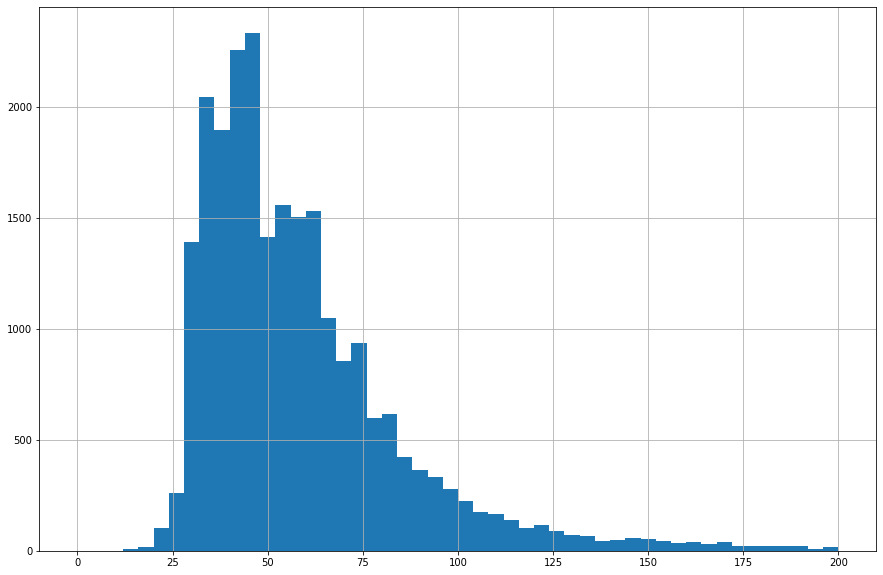

In [15]:
df.total_area.hist(bins = 50, figsize = (15,10), range = (0, 200))

The total area could be divided accordingly: 

1.   less than 30
2.   greater than 200
3.   from 30 to 200 with a 10 sq meter step.

In [16]:
def area_group(row):
  if row['total_area'] < 30:
    return 'Less than 30'
  if row['total_area'] >= 200:
    return 'Greater than 200'
  l1=[]
  for i in range(30,191,10):
    l1.append(i)
  l2=[]
  for i in range(40,201,10):
    l2.append(i)
  for i,j in zip(l1,l2):
    if row['total_area'] < j and row['total_area'] >= i:
      group = 'From ' + str(i) + ' to ' + str(j)
      return group

df['area_group'] = df.apply(area_group, axis=1)

In [17]:
mean_areas = df.pivot_table(index = 'area_group', values = ['living_area', 'kitchen_area'], aggfunc = 'mean')
mean_areas

,kitchen_area,living_area
area_group,,
From 100 to 110,16.803618,60.222018
From 110 to 120,18.284358,67.128441
From 120 to 130,18.928161,70.579312
From 130 to 140,19.157786,78.656618
From 140 to 150,22.510339,84.969027
From 150 to 160,22.790412,90.602234
From 160 to 170,22.223590,95.335823
From 170 to 180,25.084262,101.250645
From 180 to 190,23.807826,106.589130


Let us look at the mean values within the two groups: living area and kitchen area. 

Now we will substitute the missing value in the kitchen area with the mean value of its cluster. 

In [18]:
l = list(dict(df['rooms'].value_counts()).keys())
l.sort()
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

In [19]:
dictio = {}
for i in l:
  df_piece = df[df['rooms'] == i]
  dictio[i] = df_piece['living_area'].mean()

dictio

{0: 18.865245901639348,
 1: 17.89355170546834,
 2: 31.736849164747895,
 3: 47.38794074040251,
 4: 66.9832231395776,
 5: 100.0092465547945,
 6: 130.98363636363635,
 7: 163.56415094339619,
 8: 168.6833333333333,
 9: 190.25714285714284,
 10: 165.5666666666667,
 11: 133.9,
 12: 409.7,
 14: 195.15,
 15: 409.0,
 16: 180.0,
 19: 264.5}

In [20]:
for i in range(len(df)):
  if math.isnan(df.loc[i, 'living_area']):
    df.loc[i, 'living_area'] = dictio[df.loc[i, 'rooms']]
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.00,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,From 100 to 110
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,From 40 to 50
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,From 50 to 60
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,47.387941,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,From 150 to 160
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.00,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,From 100 to 110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,False,False,13.83,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,From 130 to 140
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,False,False,False,8.50,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,From 50 to 60
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,False,False,False,NaN,False,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,From 50 to 60
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,31.736849,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,From 70 to 80


In [64]:
df = df.reset_index(drop = True)

In [65]:
dictio = {}
for i in l:
  df_piece = df[df['rooms'] == i]
  dictio[i] = df_piece['kitchen_area'].mean()

dictio

{0: nan,
 1: 9.550466146111196,
 2: 9.96437446110551,
 3: 11.16621575626362,
 4: 13.267649895576197,
 5: 16.829271870952557,
 6: 20.05766781214204,
 7: 20.06229967948718,
 8: 22.125925925925927,
 9: 21.51020408163265,
 10: 22.866666666666664,
 11: 12.600000000000001,
 12: nan,
 14: 21.25,
 15: nan,
 16: 13.0,
 19: 27.6}

In [66]:
for i in range(len(df)):
  if math.isnan(df.loc[i, 'kitchen_area']):
    df.loc[i, 'kitchen_area'] = dictio[df.loc[i, 'rooms']]
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,year_added,month_added,sq_m_price,day_added,floor_is,liv_to_total,kitch_to_total,distance_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,From 100 to 110,2019,Mar,120370.370370,Thursday,other,0.472222,0.231481,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,From 40 to 50,2018,Dec,82920.792079,Tuesday,first,0.460396,0.272277,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,From 50 to 60,2015,Aug,92785.714286,Thursday,other,0.612500,0.148214,13.0
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,From 100 to 110,2018,Jun,100000.000000,Tuesday,other,0.320000,0.410000,8.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,False,False,9.100000,False,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,From 30 to 40,2018,Sep,95065.789474,Monday,other,0.473684,0.299342,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23341,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,False,13.830000,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,From 130 to 140,2017,Mar,72490.845228,Tuesday,other,0.547792,0.103356,4.0
23342,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,False,False,8.500000,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,From 50 to 60,2018,Jan,52542.372881,Monday,other,0.644068,0.144068,NaN
23343,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,False,False,9.979584,False,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,From 50 to 60,2018,Feb,44091.710758,Sunday,first,0.523810,0.176007,NaN
23344,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,31.736849,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,From 70 to 80,2017,Mar,149511.400651,Tuesday,other,0.413509,0.303583,10.0


In [24]:
df.living_area.isnull().sum()

0

In [67]:
df.kitchen_area.isnull().sum()

0

The ceiling height should be substituted with its median value. 

In [27]:
height_median = df.ceiling_height.median()
height_median 

2.65

In [28]:
df['ceiling_height'].fillna(height_median , inplace = True)

Let's have a look at the missing values again. 

In [29]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
area_group                  0
dtype: int64

###**Conclusion**
In order to fill in the missing values the following changes were made: 

1.   Replaced the missing values in balconies with 0.
2.   Cut the inliners in total and kitchen areas.
3.   Clustered the apartaments in accordance with their total area and replaced the missing values in kitchen and living areas using the mean value in its cluster. 
4. In the 'is_apartment' column we suggest that the missing value denotes that it is not an apartment as if it was the column would contain some data. 
5. Missing values in studios and open planning apartments were handled in the same manner. 
6. Parks and ponds nearby were changed into 0 if there was no information about them. 
7. The ceiling height was substituted with its median value.  

##**3. Changing Data Types**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Convert the first day exposition column and add a year, month and day of the week the apartment was added to the real estate base.

In [31]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['year_added'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month_added'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['month_added'] = pd.to_datetime(df['month_added'], format='%m').dt.month_name().str.slice(stop=3)

Convert days from integers values to strings containing days of the week. 

### **4. Adding Columns**
The task is to calculate and add the following columns to the dataframe: 

1.   The price of a square meter. 
2.   Day of the week, month and the year when the advertisement was published. 
3.   The floor where the apartment is located (first, last, other).
4.   The ratio of living and kitchen area to total area. 

Adding the column with the price of a square meter. 

In [32]:
df['sq_m_price'] = df['last_price']/df['total_area']

Adding day of the week, month and the year when the advertisement was published.

In [33]:
dayOfWeek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_added'] = df['first_day_exposition'].dt.dayofweek.map(dayOfWeek)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,year_added,month_added,sq_m_price,day_added
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,From 100 to 110,2019,Mar,120370.370370,Thursday
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,From 40 to 50,2018,Dec,82920.792079,Tuesday
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,From 50 to 60,2015,Aug,92785.714286,Thursday
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,47.387941,9,False,False,False,11.308580,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,From 150 to 160,2015,Jul,408176.100629,Friday
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,From 100 to 110,2018,Jun,100000.000000,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,False,13.830000,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,From 130 to 140,2017,Mar,72490.845228,Tuesday
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,False,False,8.500000,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,From 50 to 60,2018,Jan,52542.372881,Monday
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,False,False,9.979584,False,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,From 50 to 60,2018,Feb,44091.710758,Sunday
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,31.736849,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,From 70 to 80,2017,Mar,149511.400651,Tuesday


Specifying the floor as first, last or other. 

In [34]:
for i in range(len(df)):

  if df.loc[i,'floor'] == 1:
    df.loc[i,'floor_is'] = 'first'

  elif df.loc[i,'floor'] == df.loc[i,'floors_total']:
    df.loc[i,'floor_is'] = 'last'

  else:
    df.loc[i,'floor_is'] = 'other'

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,year_added,month_added,sq_m_price,day_added,floor_is
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,From 100 to 110,2019,Mar,120370.370370,Thursday,other
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,From 40 to 50,2018,Dec,82920.792079,Tuesday,first
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,From 50 to 60,2015,Aug,92785.714286,Thursday,other
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,47.387941,9,False,False,False,11.308580,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,From 150 to 160,2015,Jul,408176.100629,Friday,other
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,From 100 to 110,2018,Jun,100000.000000,Tuesday,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,False,13.830000,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,From 130 to 140,2017,Mar,72490.845228,Tuesday,other
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,False,False,8.500000,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,From 50 to 60,2018,Jan,52542.372881,Monday,other
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,False,False,9.979584,False,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,From 50 to 60,2018,Feb,44091.710758,Sunday,first
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,31.736849,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,From 70 to 80,2017,Mar,149511.400651,Tuesday,other


Adding the ratio of living and kitchen areas to the total area. 

In [35]:
df['liv_to_total'] = df['living_area']/df['total_area']
df['kitch_to_total'] = df['kitchen_area']/df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,year_added,month_added,sq_m_price,day_added,floor_is,liv_to_total,kitch_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,From 100 to 110,2019,Mar,120370.370370,Thursday,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,From 40 to 50,2018,Dec,82920.792079,Tuesday,first,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,From 50 to 60,2015,Aug,92785.714286,Thursday,other,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,47.387941,9,False,False,False,11.308580,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,From 150 to 160,2015,Jul,408176.100629,Friday,other,0.298037,0.071123
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,From 100 to 110,2018,Jun,100000.000000,Tuesday,other,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,False,13.830000,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,From 130 to 140,2017,Mar,72490.845228,Tuesday,other,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,False,False,8.500000,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,From 50 to 60,2018,Jan,52542.372881,Monday,other,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,False,False,9.979584,False,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,From 50 to 60,2018,Feb,44091.710758,Sunday,first,0.523810,0.176007
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,31.736849,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,From 70 to 80,2017,Mar,149511.400651,Tuesday,other,0.413509,0.303583


###**Analyze data and do the following instructions:**
*   Analyze the following parameters: area, price, number of rooms, and the ceiling height.
*   Build histograms for the following data. 

This data contain a lot of odd values such as: the total area of 900 sq meters, the ceiling height of 10.3 meters, the apartment building with 60 floors. 
So we need to get rid of the inliners. 

In [36]:
fig = px.box(df, y ="ceiling_height")
fig.show()

It is very unlikely that the height of the ceilings in the apartments would be more than 10 meters which is seen in the box plot. So we can get rid of the values that exceed 10.3 meters.

In [37]:
df = df[df['ceiling_height'] <= 10.3]

In [38]:
fig = px.box(df, y ="total_area")
fig.show()

As we can see the most of the values are below 550 sq meters so we can exclude other values.

In [39]:
df = df[df['total_area'] <= 550]

The same should be done for the kitchen area parameter.

In [40]:
fig = px.box(df, y ="kitchen_area")
fig.show()

Most values lie within the 66 sq meters amount.

In [41]:
df = df[df['kitchen_area'] <= 66]

count    23464.000000
mean        60.427841
std         34.332073
min         12.000000
25%         40.107500
50%         52.000000
75%         70.000000
max        517.000000
Name: total_area, dtype: float64
Variance is:  1178.69125074224


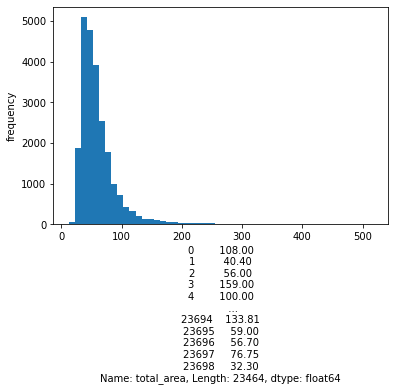

In [42]:
def params(col, bins):

  print(col.describe())
  print('Variance is: ',col.var())
  plt.hist(col, bins = bins)
  plt.xlabel(str(col))
  plt.ylabel('frequency')

params(df['total_area'], 50)
  

count    2.346400e+04
mean     6.501154e+06
std      1.024317e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
Variance is:  104922463923231.23


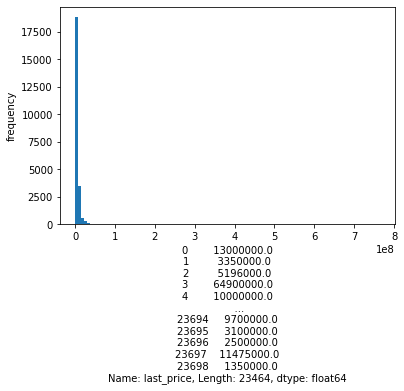

In [43]:
params(df['last_price'], 100)

count    23464.000000
mean         2.086004
std          1.059546
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
Variance is:  1.122637503456324


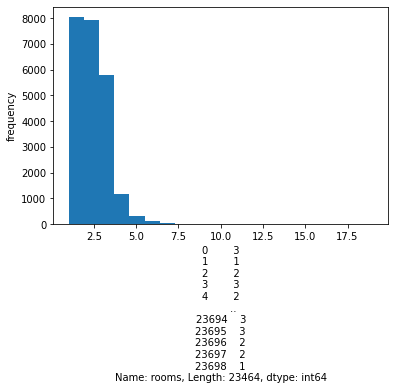

In [44]:
params(df['rooms'], 20)

count    23464.000000
mean         2.697604
std          0.236989
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64
Variance is:  0.05616381316720903


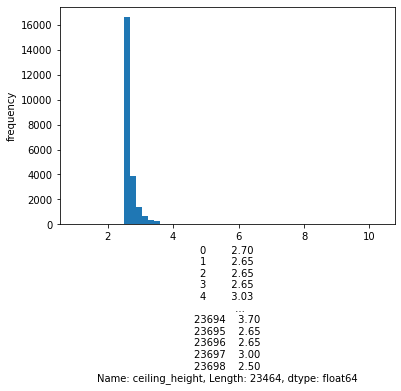

In [45]:
params(df['ceiling_height'], 50)

count    20306.000000
mean       181.507978
std        220.079076
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Variance is:  48434.799763978524


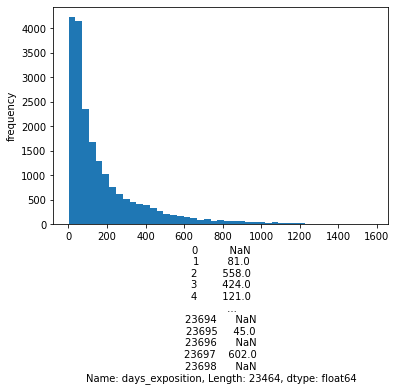

In [46]:
params(df['days_exposition'], 45)

In [47]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_added,sq_m_price,liv_to_total,kitch_to_total
count,23464.000000,2.346400e+04,23464.000000,23464.000000,23464.000000,23381.000000,23464.000000,23464.000000,23464.000000,18009.000000,18032.000000,23464.000000,8035.000000,23464.000000,9023.000000,20306.000000,23464.000000,2.346400e+04,23464.000000,23464.000000
mean,9.874105,6.501154e+06,60.427841,2.086004,2.697604,10.626149,34.494871,5.870909,10.523078,28823.708479,14203.902728,0.471318,490.387803,0.590905,518.368724,181.507978,2017.365709,9.918362e+04,0.564599,0.189944
std,5.681041,1.024317e+07,34.332073,1.059546,0.236989,6.568691,21.399685,4.865431,5.354177,12630.374000,8624.292728,0.749908,341.996439,0.883730,277.734823,220.079076,1.041623,4.975607e+04,0.111432,0.074423
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,2014.000000,1.118349e+02,0.021583,0.019328
25%,6.000000,3.450000e+06,40.107500,1.000000,2.600000,5.000000,18.500000,2.000000,7.300000,18596.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,2017.000000,7.648066e+04,0.491525,0.134882
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.500000,4.000000,9.550118,26758.000000,13095.000000,0.000000,454.000000,0.000000,503.000000,96.000000,2017.000000,9.487805e+04,0.566667,0.175439
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.800000,8.000000,11.600000,37310.000000,16294.500000,1.000000,612.000000,1.000000,730.000000,232.000000,2018.000000,1.140377e+05,0.638298,0.234463
max,50.000000,7.630000e+08,517.000000,19.000000,10.300000,60.000000,347.500000,33.000000,66.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.907500e+06,1.625886,0.795843


###**Conclusion**
In general the real estate is sold within 176 days. Long time could be considered more than 222 days and short is if less than 44 days. 

To analyse the depedency of the price from the square meter price, distance from city center, the floor and the date the advertisement was published. 

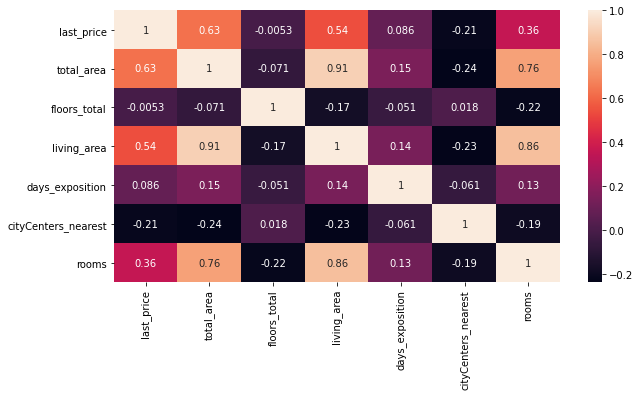

In [48]:
corr = df[['last_price',\
           'total_area',\
           'floors_total',\
           'living_area',\
           'days_exposition',\
           'cityCenters_nearest',\
           'rooms']].corr()
plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot=True)

The price is mostly influenced by the total and living area and number of rooms. There is also a negative correlation between the price and the approximity to the city center. 

In [49]:
df = df[df['last_price'] <= df.last_price.quantile(0.995)]

In [50]:
df = df.reset_index(drop = True)

In [51]:
fig = px.box(df, x='day_added', y='last_price')

fig.show()

There is no correlation of the day of the week with the price. 

In [52]:
fig = px.box(df, x='month_added', y='last_price')

fig.show()

June and May are the best months to buy an apartment, while April and March are best for selling.

In [62]:
fig = px.box(df, x='year_added', y='last_price')

fig.show()

Since 2014 the prices started to fall and did not grow until 2017. 

In [63]:
fig = px.box(df, x='floor_is', y='last_price')

fig.show()

The apartments on the first floor tend to be cheaper than on the last one, while the highest price is for the apartments on the first floor. 

###**Conclusion**
The price of the apartment is mostly influenced by the area and the number of rooms. The best months to buy an apartment is June and May and to sell - April and March. Since 2014 the prices started to fall down and did not grow until 2017. The first floor apartmets are the cheapest. Last floor is more expensive, but not as expensive as other floors. 

Choose 10 places with the greatest number of advertisement. Calculate the average price per square meter in these localities. Find the places with highest and lowest prices. 

Let us look at the list of all localities.

In [55]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [56]:
df = df.reset_index(drop = True)

Replace the missing values with 'True' and replace all the values that are not unified (e.g. same words or location types are spelled differently).

In [57]:
df['locality_name'].fillna("Не указано", inplace=True)

for i in range(0, len(df)):
  name = df.loc[i, 'locality_name']
  if 'посёлок городского типа ' in name:
    name = name.replace('посёлок городского типа ', '')
    df.loc[i, 'locality_name'] = name
  if 'ё' in name:
    name = name.replace('ё', 'е')
  if 'городской поселок ' in name:
    name = name.replace('городской поселок ', '')
    df.loc[i, 'locality_name'] = name
  if 'коттеджный поселок ' in name:
    name = name.replace('коттеджный поселок ', '')
    df.loc[i, 'locality_name'] = name
  if 'поселок городского типа ' in name:
    name = name.replace('поселок городского типа ', '')
    df.loc[i, 'locality_name'] = name
  if 'поселок ' in name:
    name = name.replace('поселок ', '')
    df.loc[i, 'locality_name'] = name
  if 'деревня ' in name:
    name = name.replace('деревня ', '')
    df.loc[i, 'locality_name'] = name
  if 'садовое товарищество ' in name:
    name = name.replace('садовое товарищество ', '')
    df.loc[i, 'locality_name'] = name
  if 'село ' in name:
    name = name.replace('село ', '')
    df.loc[i, 'locality_name'] = name
  if 'садоводческое некоммерческое товарищество ' in name:
    name = name.replace('садоводческое некоммерческое товарищество ', '')
    df.loc[i, 'locality_name'] = name
  if 'при железнодорожной станции ' in name:
    name = name.replace('при железнодорожной станции ','')    
    df.loc[i, 'locality_name'] = name

In [58]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Calculate the median value of the square meter price for the ten most expensive localities.

In [86]:
p_t = df.pivot_table(index='locality_name', values = 'sq_m_price', aggfunc = ['count','median'])

localty_group_table = p_t.sort_values(by = ('median', 'sq_m_price'), ascending=False)

localty_group_table[:10]

,count,median
,sq_m_price,sq_m_price
locality_name,,
Санкт-Петербург,15464,104403.543423
Зеленогорск,24,101666.666667
Пушкин,369,100000.000000
Сестрорецк,183,99678.456592
Левашово,1,96997.690531
Кудрово,451,95348.837209
Парголово,323,91917.591125
Мистолово,11,90888.888889


As we can see the most expensive real estate is in St. Petersburg which is  expected. It was quite surprisingly that Zelenogorsk is on the second position, then Pushkin even though they are further from the city center compared to Kudrovo where the prices are lower. 

In [89]:
localty_group_table.tail(10)

,count,median
,sq_m_price,sq_m_price
locality_name,,
Житково,2,14956.275202
Ям-Тесово,2,13711.553373
Сижно,1,13709.677419
Тесово-4,1,12931.034483
Малая Романовка,1,12724.550898
Совхозный,2,12629.129129
Выскатка,2,12335.480902
Вахнова Кара,1,11688.311688


We can see that the lowest price is about 10 times less than the highest one. 

###**Conclusion**
In order to analyze the dataset we have to unify the location names. The highest prices are in St Petersburg which is 10 times greater than the lowest price in Leningradsky region outskirts.